<a href="https://colab.research.google.com/github/Parsar22/Education/blob/main/DATA_3320_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this analysis is to explore the influence of socioeconomic factors on school performance, specifically focusing on how these factors predict school ACT scores.

## Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Load clean data

In [3]:
df_X_train = pd.read_csv('https://raw.githubusercontent.com/Parsar22/Education/main/training_data.csv')
df_X_test = pd.read_csv('https://raw.githubusercontent.com/Parsar22/Education/main/testing_data.csv')



This analysis utilizes the '[df_X_train](https://https://raw.githubusercontent.com/Parsar22/Education/main/training_data.csv)' and '[df_X_test](https://https://raw.githubusercontent.com/Parsar22/Education/main/testing_data.csv)' datasets, which were derived from larger educational datasets [edgap](https://github.com/Parsar22/Education/blob/1ef80dbb86f98226108ed3cc586b3e162da545f7/EdGap_data.xlsx) and [School_info](https://nces.ed.gov/ccd/pubschuniv.asp) involving various socioeconomic indicators and school performance metrics. These datasets were cleaned and prepared in a preliminary analysis phase, ensuring they are primed for detailed exploration in this study.

In [4]:
df_X_test.head()

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,state,average_act
0,-0.456111,1.666623,0.018405,1.945481,-1.475551,PA,23.742369
1,-0.136624,0.171062,-0.036986,-0.581887,-0.378993,IN,20.975580
2,2.402719,0.153901,1.874851,-1.547830,0.529598,PA,22.081807
3,5.721571,-0.780190,-3.274160,-1.346532,1.755671,IL,16.600000
4,-0.856343,0.002825,0.254246,0.142375,-0.757037,MO,21.800000


In [5]:
df_X_train.head()

,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,state,average_act
0,0.090854,-0.761019,-1.377516,-0.404596,1.653943,PA,16.782662
1,-0.129385,-0.789675,0.392835,-0.156520,-0.955663,WI,21.600000
2,-0.370680,0.687930,0.010842,0.406827,-1.149005,LA,23.300000
3,-0.103548,-0.534432,-0.417055,-0.405627,-0.562910,WI,22.700000
4,-1.370897,0.703161,0.801493,0.475961,-1.218191,OH,23.000000


## State your questions

## State Your Questions

To understand the relationship between average school ACT performance and socioeconomic factors, several specific questions will guide our analysis:

1. **How do individual socioeconomic factors such as unemployment rate, percentage of college graduates, and median income correlate with average ACT scores?**
   - This question aims to identify which factors are most strongly correlated with ACT scores and may thus influence them the most.

2. **Does the percentage of students receiving free lunch (as a proxy for poverty) affect school performance on the ACT?**
   - Investigating the impact of economic disadvantage on academic performance, this question focuses on how lower economic status within a school's community might correlate with lower academic achievement.

3. **Are there significant differences in average ACT scores based on varying levels of median household income within the same state?(Additional Question)**
   - This question focuses on intra-state variations and seeks to understand if wealth disparities within the same state are reflected in school performance.

4. **Can a regression model that includes these socioeconomic variables effectively predict average ACT scores? What is the accuracy of such a model?**
   - This seeks to quantify the relationship by building a predictive model and evaluating its effectiveness.


## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

In [6]:
correlation_matrix = df_X_train.drop('state', axis=1).corr()

correlations_with_act = correlation_matrix['average_act']

print(correlations_with_act)

rate_unemployment   -0.433313
percent_college      0.451005
percent_married      0.438244
median_income        0.458466
percent_lunch       -0.777266
average_act          1.000000
Name: average_act, dtype: float64


The analysis revealed the strongest negative correlation to be with the percentage of students receiving free lunch.  This suggests a significant link between economic disadvantage and lower ACT performance. Additionally, moderately positive correlations were found with median income and the percentage of college graduates within an area, indicating that higher income and more educational attainment may correspond to higher ACT scores.

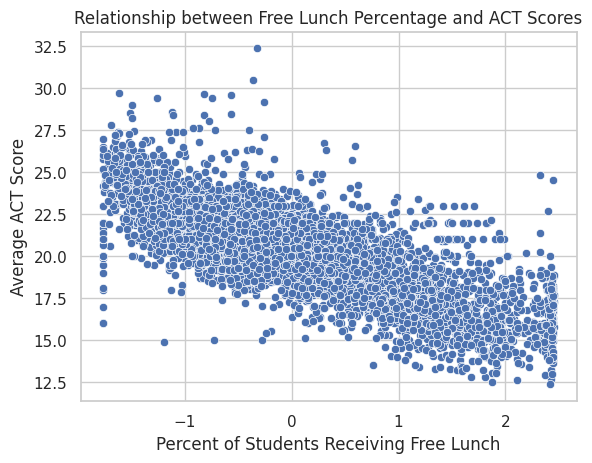

In [7]:
sns.scatterplot(x='percent_lunch', y='average_act', data=df_X_train)
plt.xlabel('Percent of Students Receiving Free Lunch')
plt.ylabel('Average ACT Score')
plt.title('Relationship between Free Lunch Percentage and ACT Scores')
plt.show()

The scatter plot confirms a negative correlation between the percent of students receiving free lunch and average ACT scores. Schools with a higher percentage of students from low-income backgrounds tend to have lower average ACT scores. This aligns with the findings from the correlation analysis in Question 1.

<Figure size 1200x800 with 0 Axes>

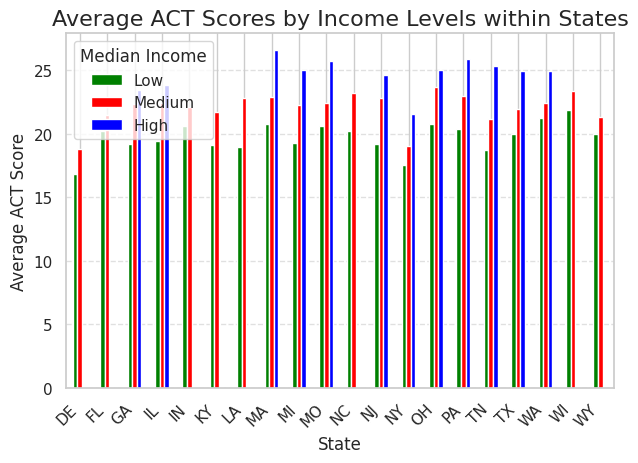

Total number of states: 20


In [8]:
grouped_by_state_income = df_X_train.groupby(['state', pd.cut(df_X_train['median_income'], bins=3, labels=['Low', 'Medium', 'High'])])
average_act_by_group = grouped_by_state_income['average_act'].mean()

colors = ['green', 'red', 'blue']

plt.figure(figsize=(12, 8))
average_act_by_group.unstack().plot(kind='bar', color=colors)
plt.xlabel('State')
plt.ylabel('Average ACT Score')
plt.title('Average ACT Scores by Income Levels within States', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(title='Median Income', labels=['Low', 'Medium', 'High'], loc='upper left')

plt.tight_layout()
plt.show()

number_of_states = df_X_train['state'].nunique()
print("Total number of states:", number_of_states)

The Matplotlib bar chart clearly illustrates a link between median household income levels and average ACT scores within states.  In most states, there's a visible trend where schools located in areas with higher median income exhibit higher average ACT scores compared to lower-income areas. This pattern highlights the potential influence of socioeconomic inequality within states on students' academic achievement.

Training data shape: (6280, 7)
Testing data shape: (1571, 7)

Training data types:
 rate_unemployment    float64
percent_college      float64
percent_married      float64
median_income        float64
percent_lunch        float64
state                 object
average_act          float64
dtype: object

Summary statistics for training data:
        rate_unemployment  percent_college  percent_married  median_income  \
count       6.280000e+03     6.280000e+03     6.280000e+03   6.280000e+03   
mean       -1.425611e-16     1.954558e-16    -1.487840e-16   9.843506e-17   
std         1.000080e+00     1.000080e+00     1.000080e+00   1.000080e+00   
min        -1.693803e+00    -2.873339e+00    -3.274160e+00  -2.005660e+00   
25%        -6.791637e-01    -7.103787e-01    -5.620903e-01  -6.326237e-01   
50%        -2.234205e-01    -8.134921e-02     1.752877e-01  -2.156926e-01   
75%         4.228092e-01     6.461227e-01     7.304180e-01   3.857275e-01   
max         8.284643e+00     2.586306e+00  

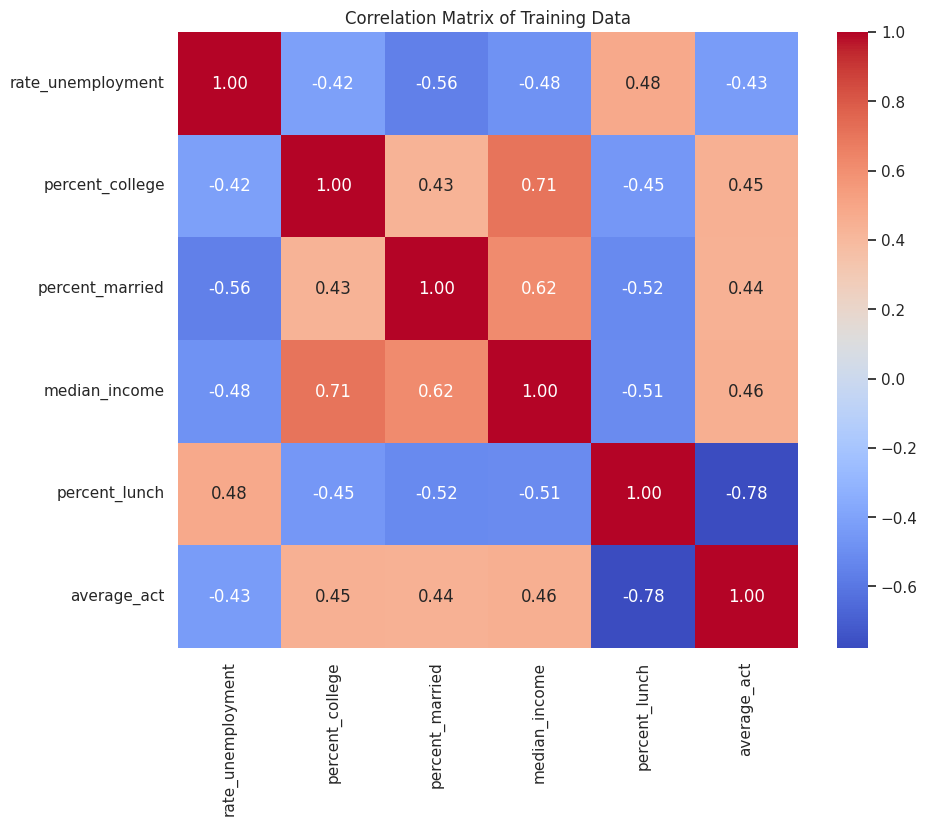

Mean Squared Error: 2.2300944173200823
R-squared: 0.6486714863567389


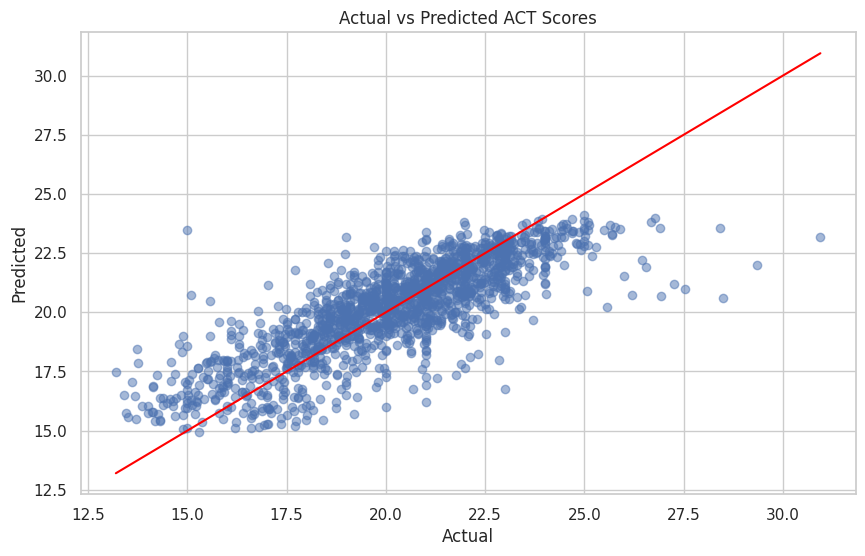

In [17]:
print("Training data shape:", df_X_train.shape)
print("Testing data shape:", df_X_test.shape)
print("\nTraining data types:\n", df_X_train.dtypes)
print("\nSummary statistics for training data:\n", df_X_train.describe())

correlation_matrix = df_X_train.drop('state', axis=1).corr()
correlations_with_act = correlation_matrix['average_act']
print(correlations_with_act)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Training Data')
plt.show()

X_train = df_X_train.drop(['average_act','state'], axis=1)
y_train = df_X_train['average_act']
X_test = df_X_test.drop(['average_act','state'], axis=1)
y_test = df_X_test['average_act']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted ACT Scores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

This code provides initial insights into the potential relationship between socioeconomic factors and ACT scores. The data exploration reveals summary statistics and correlations between features like unemployment rate, percentage of college graduates, median income, percentage of students on free lunch, and ACT scores. The correlation heatmap visually highlights these relationships.

In [9]:
def plot_results(y_train, y_test, y_pred_train, y_pred_test):
    one_train = np.linspace(min(y_train), max(y_train), 100)
    one_test = np.linspace(min(y_test), max(y_test), 100)
    rmse_test = np.sqrt(np.mean((y_pred_test - y_test) ** 2))
    rmse_train = np.sqrt(np.mean((y_pred_train - y_train) ** 2))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(y_pred_train, y_train, 'o')
    ax1.plot(one_train, one_train, '-', label=f"RMSE = {rmse_train:.2f}")
    ax1.set_title("Training Set")
    ax1.set_xlabel("Predicted ACT Score")
    ax1.set_ylabel("Actual ACT Score")
    ax1.legend()

    ax2.plot(y_pred_test, y_test, 'o')
    ax2.plot(one_test, one_test, '-', label=f"RMSE = {rmse_test:.2f}")
    ax2.legend()
    ax2.set_title("Test Set")
    ax2.set_xlabel("Predicted ACT Score")
    ax2.set_ylabel("Actual ACT Score")
    fig.set_size_inches(12, 5)

    plt.show()

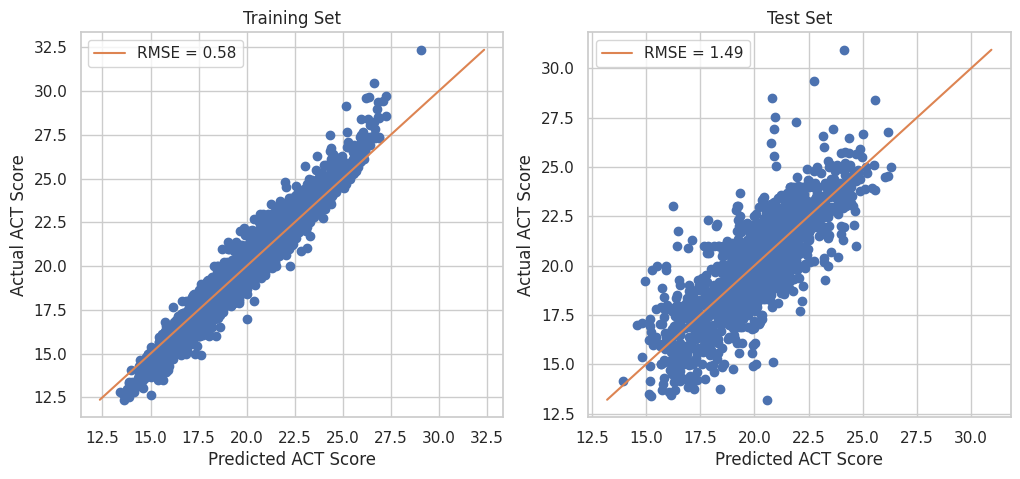

In [10]:
y_train = df_X_train['average_act']
y_test = df_X_test['average_act']

features = ['rate_unemployment', 'percent_college', 'median_income', 'percent_lunch']
X_train = df_X_train[features]
X_test = df_X_test[features]

rf_reg = RandomForestRegressor(n_estimators=100, random_state=45)


rf_reg.fit(X_train, y_train)

y_pred_test = rf_reg.predict(X_test)
y_pred_train = rf_reg.predict(X_train)

plot_results(y_train, y_test, y_pred_train, y_pred_test)

The results obtained from the Random Forest Regression model, while requiring refinement due to overfitting, support a correlation between socioeconomic variables and average ACT scores. The model's good performance on training data and decreased accuracy on the testing set suggest that socioeconomic factors play a role in influencing academic outcomes as measured by the ACT.

## Conclusion

Our analysis yielded insights into the relationship between socioeconomic factors and ACT scores. Socioeconomic factors like median income and free lunch rate showed correlations with ACT scores. The models, while capable of prediction, suffered from overfitting.